In [78]:
!pip install yfinance==0.2.4

  Using cached yfinance-0.2.4-py2.py3-none-any.whl (51 kB)
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.1.67
    Uninstalling yfinance-0.1.67:
      Successfully uninstalled yfinance-0.1.67


In [79]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [80]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    
    
    fig.show()

In [81]:
tesla = yf.Ticker("TSLA")

In [82]:
tesla_data = tesla.history(period="max")

In [83]:
tesla_data.reset_index(inplace=True)

tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [84]:
game_stop = yf.Ticker("GME")

In [85]:
Game_Stop_data = game_stop.history(period="max")

In [86]:
Game_Stop_data.reset_index(inplace=True)

Game_Stop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [87]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

tdata = requests.get(url).text

In [88]:
tslasoup= BeautifulSoup(tdata,'html5lib')

In [89]:
tsla_data = pd.DataFrame(columns=["Date","Revenue"])

for row in tslasoup.find("tbody").find_all('tr'):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    
    tsla_data=tsla_data.append({"Date":date,"Revenue":revenue}, ignore_index=True)
    
tsla_data.head()

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


In [90]:
tsla_data["Revenue"] = tsla_data['Revenue'].str.replace(',|\$',"")
tsla_data.dropna(inplace=True)

tsla_data = tsla_data[tsla_data['Revenue'] != ""]

tsla_data.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


In [91]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

gmedata = requests.get(url).text

In [92]:
gmesoup= BeautifulSoup(gmedata,'html5lib')

In [93]:
gme_data = pd.DataFrame(columns=["Date","Revenue"])

for row in gmesoup.find("tbody").find_all('tr'):
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    
    gme_data=gme_data.append({"Date":date,"Revenue":revenue}, ignore_index=True)
    
gme_data.head()

,Date,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"


In [94]:
gme_data["Revenue"] = gme_data['Revenue'].str.replace(',|\$',"")
gme_data.dropna(inplace=True)

gme_data = gme_data[gme_data['Revenue'] != ""]

gme_data.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


In [95]:
gme_data.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


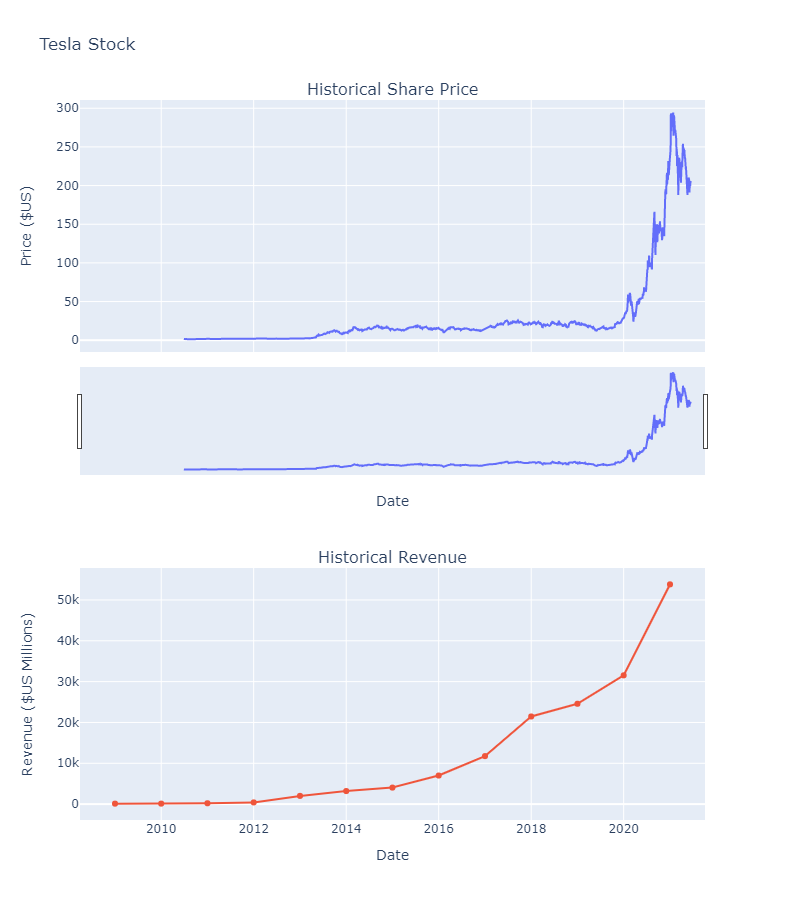

In [96]:
make_graph(tesla_data,tsla_data,'Tesla Stock')

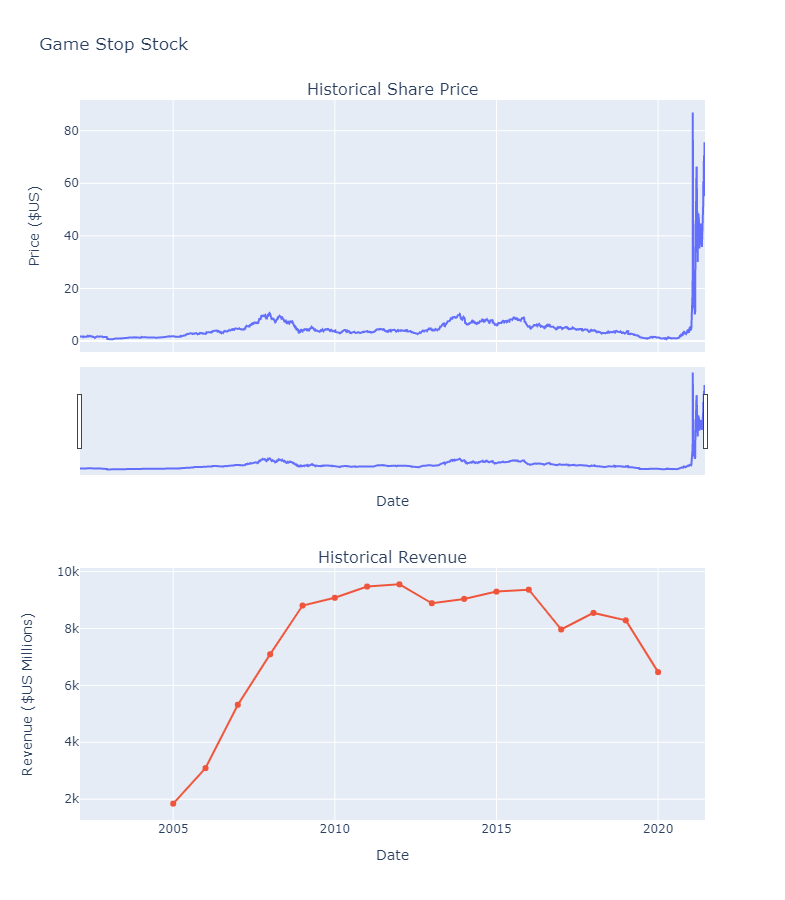

In [97]:
make_graph(Game_Stop_data,gme_data,'Game Stop Stock')